In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv('Trucking_Data_Cleaned.csv')
df.columns

Index(['ID', 'OBS_DATE', 'TRUCK_D11', 'VMT', 'VMT_D11', 'TSI_Freight',
       'TSI_Freight_C', 'IND_PRO', 'MANUF', 'INV_TO_SALES', 'IDX_TRUCK_D11',
       'PETROLEUM', 'IDX_PETROLEUM_D11', 'NATURAL_GAS', 'IDX_RAIL_PM',
       'IDX_WATERBORNE_D11', 'date_time'],
      dtype='object')

In [8]:
df.columns

Index(['TRUCK_D11', 'VMT', 'VMT_D11', 'TSI_Freight', 'TSI_Freight_C',
       'IND_PRO', 'MANUF', 'INV_TO_SALES', 'IDX_TRUCK_D11', 'PETROLEUM',
       'IDX_PETROLEUM_D11', 'NATURAL_GAS', 'IDX_RAIL_PM',
       'IDX_WATERBORNE_D11'],
      dtype='object')

In [11]:
X = df.drop(['TRUCK_D11'], axis=1)
y = df['TRUCK_D11']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((236, 13), (60, 13), (236,), (60,))

In [15]:
X_train.corr()

,VMT,VMT_D11,TSI_Freight,TSI_Freight_C,IND_PRO,MANUF,INV_TO_SALES,IDX_TRUCK_D11,PETROLEUM,IDX_PETROLEUM_D11,NATURAL_GAS,IDX_RAIL_PM,IDX_WATERBORNE_D11
VMT,1.000000,0.648887,0.498840,0.120337,0.490861,0.475871,-0.344059,0.476965,0.535475,0.453446,-0.152127,0.176895,0.042047
VMT_D11,0.648887,1.000000,0.740505,0.174561,0.749588,0.720489,-0.491917,0.712683,0.653812,0.664546,0.420811,0.323864,0.054715
TSI_Freight,0.498840,0.740505,1.000000,0.022426,0.777284,0.826278,-0.641413,0.991988,0.865592,0.878048,0.578388,-0.128252,-0.082610
TSI_Freight_C,0.120337,0.174561,0.022426,1.000000,0.017760,0.006573,-0.116306,0.014128,-0.035113,-0.036761,-0.027857,0.104311,0.149444
IND_PRO,0.490861,0.749588,0.777284,0.017760,1.000000,0.832981,-0.417591,0.729585,0.556503,0.560537,0.415889,0.244535,0.154816
MANUF,0.475871,0.720489,0.826278,0.006573,0.832981,1.000000,-0.742052,0.806001,0.628419,0.637230,0.506459,0.168979,-0.013377
INV_TO_SALES,-0.344059,-0.491917,-0.641413,-0.116306,-0.417591,-0.742052,1.000000,-0.639739,-0.493942,-0.499615,-0.398549,0.238310,0.274152
IDX_TRUCK_D11,0.476965,0.712683,0.991988,0.014128,0.729585,0.806001,-0.639739,1.000000,0.859022,0.872194,0.586614,-0.150076,-0.147883
PETROLEUM,0.535475,0.653812,0.865592,-0.035113,0.556503,0.628419,-0.493942,0.859022,1.000000,0.985298,0.504529,-0.200117,-0.083161
IDX_PETROLEUM_D11,0.453446,0.664546,0.878048,-0.036761,0.560537,0.637230,-0.499615,0.872194,0.985298,1.000000,0.547104,-0.195783,-0.081532


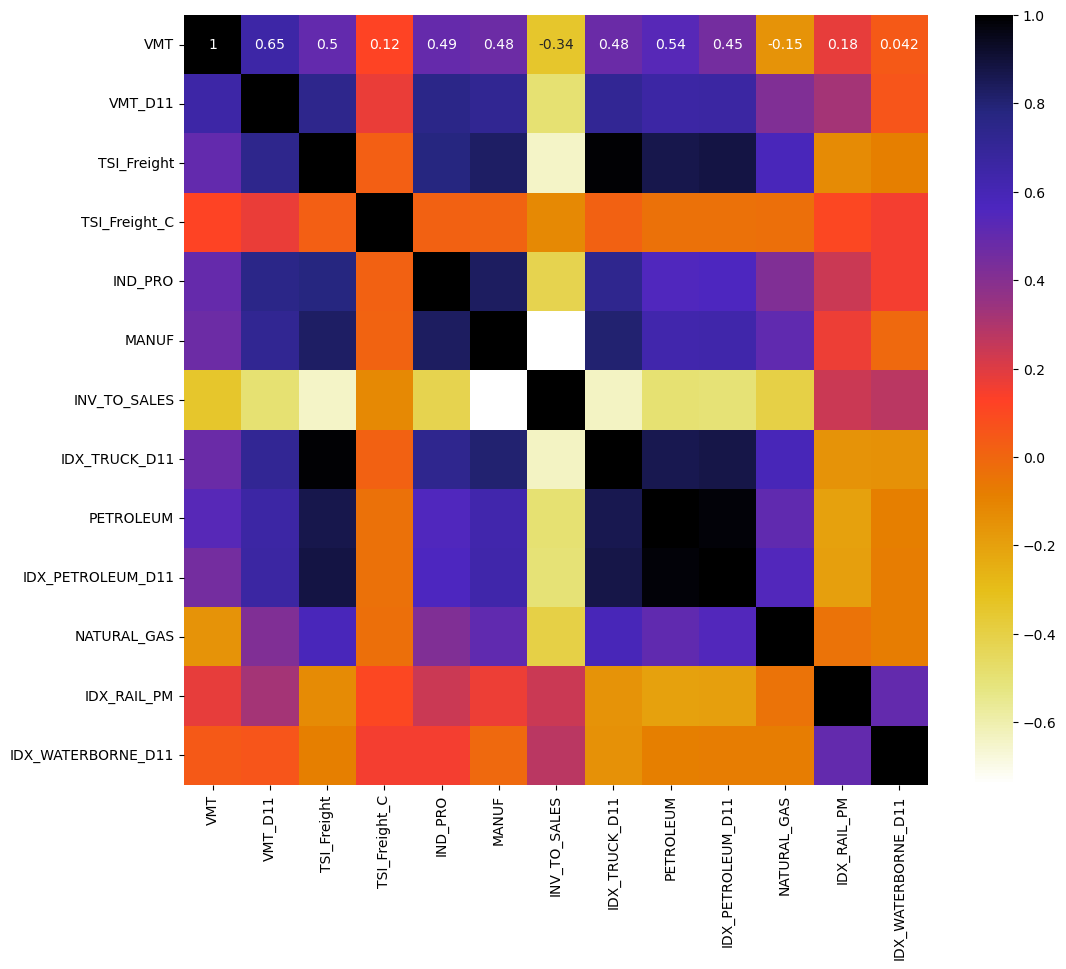

In [16]:
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [17]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

### Droppping Features with Correlations > 0.70

In [31]:
corr_features = correlation(X_train, 0.70)
corr_features

{'TSI_Freight'}

In [32]:
X_train.drop(corr_features, axis=1, inplace=True)
X_test.drop(corr_features, axis=1, inplace=True)
X_train.shape, X_test.shape

((236, 7), (60, 7))

In [33]:
def scaler_standard(X_train, X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled

In [34]:
X_train_scaled, X_test_scaled = scaler_standard(X_train, X_test)

## Modeling

### Linear Regression

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

lreg = LinearRegression()
lreg.fit(X_train_scaled, y_train)
lreg_pred = lreg.predict(X_test_scaled)
mae = mean_absolute_error(y_test, lreg_pred)
r2 = r2_score(y_test, lreg_pred)

print('Linear Regression')
print('R2 Score Value {:.4f}'.format(r2))
print('MAE value: {:4f}'.format(mae))

Linear Regression
R2 Score Value 0.8256
MAE value: 5.347342


### Lasso Regression

In [36]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, r2_score

lasso = Lasso()
lasso.fit(X_train_scaled, y_train)
lasso_pred = lasso.predict(X_test_scaled)
mae = mean_absolute_error(y_test, lasso_pred)
r2 = r2_score(y_test, lasso_pred)

print('Lasso Regression')
print('R2 Score Value {:.4f}'.format(r2))
print('MAE value: {:4f}'.format(mae))

Lasso Regression
R2 Score Value 0.8007
MAE value: 5.807929


### Ridge Regression

In [37]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, r2_score
ridge = Ridge()
ridge.fit(X_train_scaled, y_train)
ridge_pred = ridge.predict(X_test_scaled)
mae = mean_absolute_error(y_test, ridge_pred)
r2 = r2_score(y_test, ridge_pred)

print('Ridge Regression')
print('R2 Score Value {:.4f}'.format(r2))
print('MAE value: {:4f}'.format(mae))


Ridge Regression
R2 Score Value 0.8251
MAE value: 5.344740


### Support Vector Regression

In [38]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, r2_score

svr = SVR()
svr.fit(X_train_scaled, y_train)
svr_pred = svr.predict(X_test_scaled)
mae = mean_absolute_error(y_test, svr_pred)
r2 = r2_score(y_test, svr_pred)

print('Support Vector Regression')
print('R2 Score Value {:.4f}'.format(r2))
print('MAE value: {:4f}'.format(mae))

Support Vector Regression
R2 Score Value 0.8152
MAE value: 5.326264


### Random Forest Regressor

In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error as MAE, r2_score

rf = RandomForestRegressor()
rf.fit(X_train_scaled, y_train)
rf_pred = rf.predict(X_test_scaled)
mae = MAE(y_test, rf_pred)
r2 = r2_score(y_test, rf_pred)

print('Random Forrest Regressor')
print('R2 Score Value {:.4f}'.format(r2))
print('MAE value: {:4f}'.format(mae))

Random Forrest Regressor
R2 Score Value 0.9717
MAE value: 1.828417


### K-Neighbors Regressor

In [40]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error as MAE, r2_score

knn = KNeighborsRegressor()
knn.fit(X_train_scaled, y_train)
knn_pred = knn.predict(X_test_scaled)
mae = MAE(y_test, knn_pred)
r2 = r2_score(y_test, knn_pred)

print('K-Neighbors Regressor')
print('R2 Score Value {:.4f}'.format(r2))
print('MAE value: {:4f}'.format(mae))


K-Neighbors Regressor
R2 Score Value 0.9108
MAE value: 3.281667


## Tuning

### Tuned Random Forest

In [41]:
param_grid = [{'bootstrap': [True, False], 
               'max_depth':[10,20,30,40,50,60,70,80,90, 100, 110, 120], 
               'min_samples_leaf':[1,3,4], 
               'min_samples_split':[2,6,10], 'n_estimators':[5,20,50,100]}]
f_reg = RandomForestRegressor()
Random_rf = RandomizedSearchCV(f_reg, param_grid, cv=10, verbose=2, n_jobs=-1)
Random_rf.fit(X_train_scaled, y_train)
best_random_grid = Random_rf.best_estimator_
bestrf_pred = best_random_grid.predict(X_test_scaled)
mae = MAE(y_test, bestrf_pred)
r2 = r2_score(y_test, bestrf_pred)
print('Random Forest Tuned')
print('R2 Score Value {:.4f}'.format(r2))
print('MAE value: {:4f}'.format(mae))

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Random Forest Tuned
R2 Score Value 0.9703
MAE value: 2.077000


### Tuned Ridge Regression

In [42]:
from sklearn.exceptions import FitFailedWarning, ConvergenceWarning
import warnings
warnings.filterwarnings(action='ignore')
ridge_params = [{'alpha': (np.logspace(-11,11,100)),
                 'solver':['auto', 'svd', 'cholesky','lsqr','sparse_cg','sag','saga','lbfgs']}]
ridge = Ridge()
random_ridge = RandomizedSearchCV(ridge, ridge_params, cv=10, n_jobs=-1)
random_ridge.fit(X_train_scaled, y_train)
best_ridge = random_ridge.best_estimator_
rbest_pred = best_ridge.predict(X_test_scaled)
mae = MAE(y_test, rbest_pred)
r2 = r2_score(y_test, rbest_pred)

print('Ridge Tuned')
print('R2 Score Value {:.4f}'.format(r2))
print('MAE value: {:4f}'.format(mae))


Ridge Tuned
R2 Score Value 0.8257
MAE value: 5.346916


### Plotting Features Importance

Text(0, 0.5, 'Features')

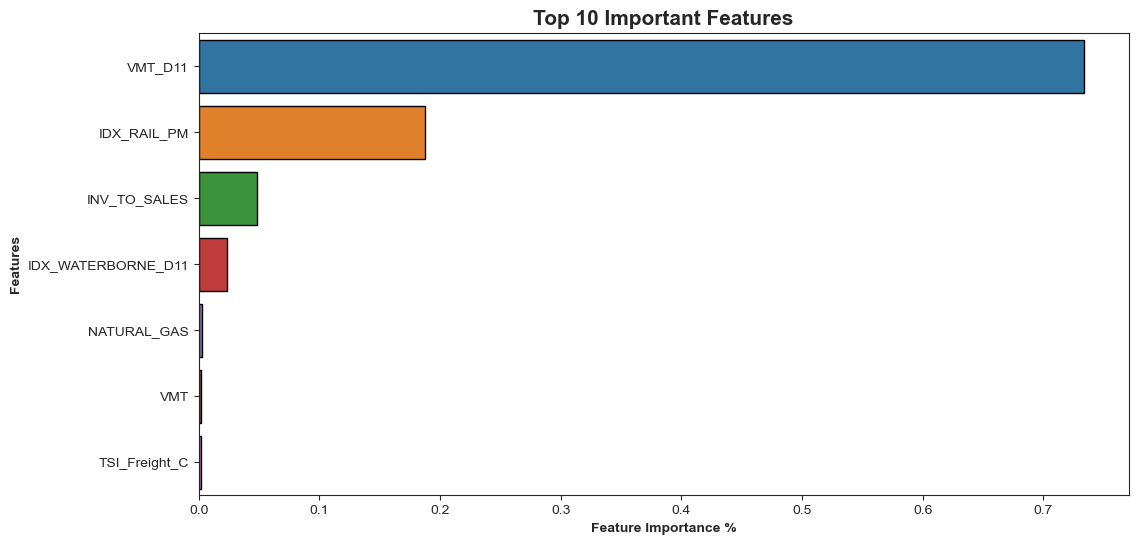

In [43]:
feature_importances = Random_rf.best_estimator_.feature_importances_
importance_df = pd.DataFrame({'feature': X_train.columns, 'importance':feature_importances}).sort_values('importance', ascending=False)
plt.figure(figsize=(12,6))
sns.set_style('ticks')
ax = sns.barplot(data=importance_df, x='importance', y='feature', ec='black')
ax.set_title('Top 10 Important Features', weight='bold', fontsize=15)
ax.set_xlabel('Feature Importance %', weight='bold')
ax.set_ylabel('Features', weight='bold')

### Dropping Features with Low Importance

In [44]:
Xtrain_new = X_train.drop(['NATURAL_GAS', 'TSI_Freight_C', 'VMT'], axis=1)
Xtest_new = X_test.drop(['NATURAL_GAS', 'TSI_Freight_C', 'VMT'], axis=1)

In [45]:
Xtrain_new.columns

Index(['VMT_D11', 'INV_TO_SALES', 'IDX_RAIL_PM', 'IDX_WATERBORNE_D11'], dtype='object')

In [46]:
Xtrain_new_scaled, Xtest_new_scaled = scaler_standard(Xtrain_new, Xtest_new)

In [47]:
best_random_grid.fit(Xtrain_new_scaled, y_train)
bestrf_pred = best_random_grid.predict(Xtest_new_scaled)
mae = MAE(y_test, bestrf_pred)
r2 = r2_score(y_test, bestrf_pred)

print('Random Forest Tuned + Refined Data')
print('R2 Score Value {:.4f}'.format(r2))
print('MAE value: {:4f}'.format(mae))


Random Forest Tuned + Refined Data
R2 Score Value 0.9628
MAE value: 1.855333


In [50]:
rf1 = RandomForestRegressor()
rf1.fit(Xtrain_new_scaled, y_train)
rf1_pred = rf1.predict(Xtest_new_scaled)
mae = MAE(y_test, rf1_pred)
r2 = r2_score(y_test, rf1_pred)

print('Random Forrest Regressor')
print('R2 Score Value {:.4f}'.format(r2))
print('MAE value: {:4f}'.format(mae))

Random Forrest Regressor
R2 Score Value 0.9745
MAE value: 1.817083


# Summary

Generated a RandomForestRegressor model for the feature TRUCK_D11 (trucking activity in the D11 region) and achieved a R2 score of 0.9745 and an MAE value of 1.81.  